In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## BROADCAST VARIATING SIZE

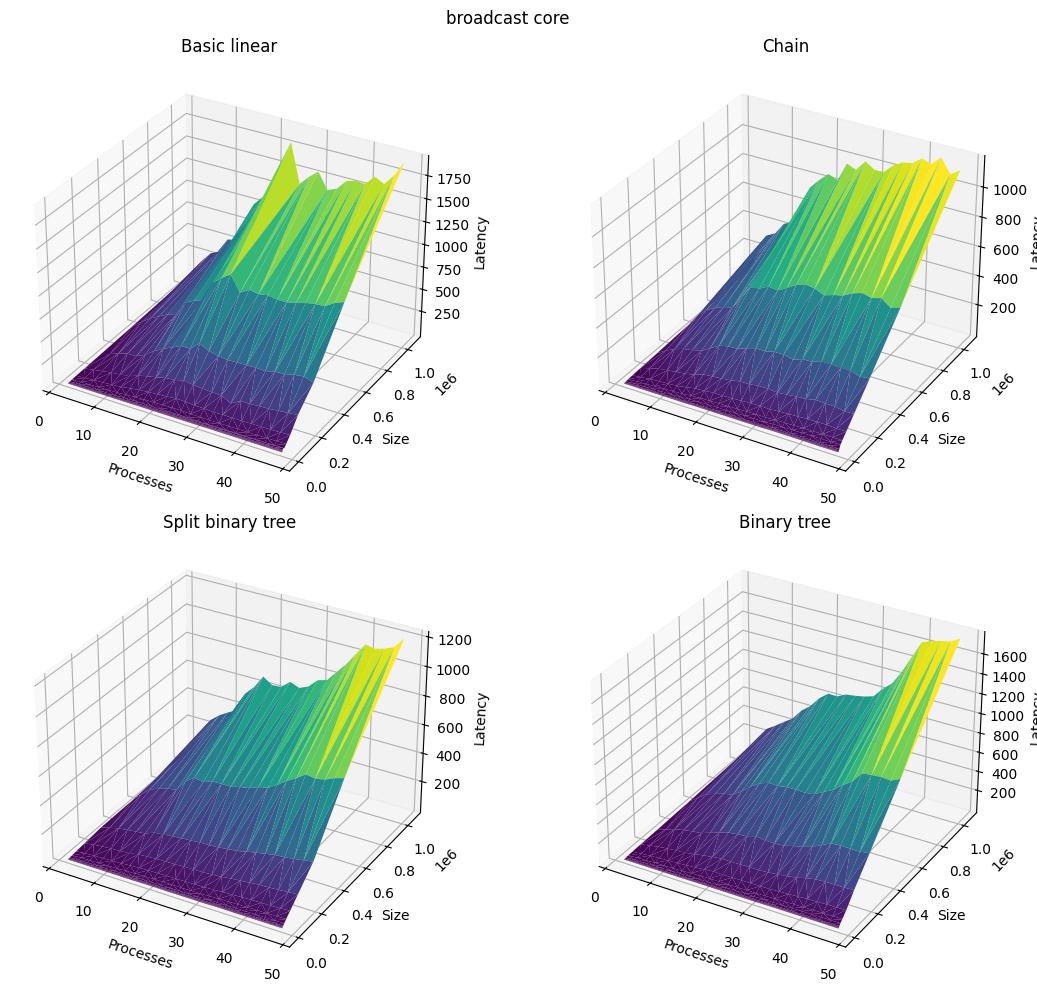

In [7]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_core_thin.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    #fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')
axs[0,0].set_title('Basic linear')
axs[0,1].set_title('Chain')
axs[1,0].set_title('Split binary tree')
axs[1,1].set_title('Binary tree')

fig.suptitle('broadcast core')
#plt.title('bcast core')
# Mostra la figura
plt.tight_layout()
plt.show()


/var/folders/72/24j7jy9s6sb2xm_dc84kdhm00000gn/T/ipykernel_98205/1619465466.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Log_Processes'] = np.log2(data['Processes'])


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     6929.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:00:26   Log-Likelihood:                -2543.9
No. Observations:                 480   AIC:                             5096.
Df Residuals:                     476   BIC:                             5113.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.4149      9.143     -0.373

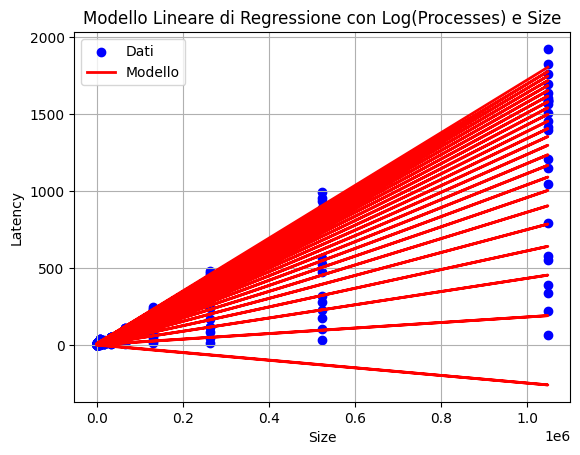

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_core_thin.csv")

# Seleziona le covariate e la variabile dipendente
X = data[['Size']]
y = data['Latency']

# Calcola il logaritmo in base due dei processi
X['Log_Processes'] = np.log2(data['Processes'])

X['Interaction'] = X['Log_Processes'] * X['Size']
# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Size'], y, color='blue', label='Dati')
plt.plot(data['Size'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Log(Processes) e Size')
plt.legend()
plt.grid(True)
plt.show()


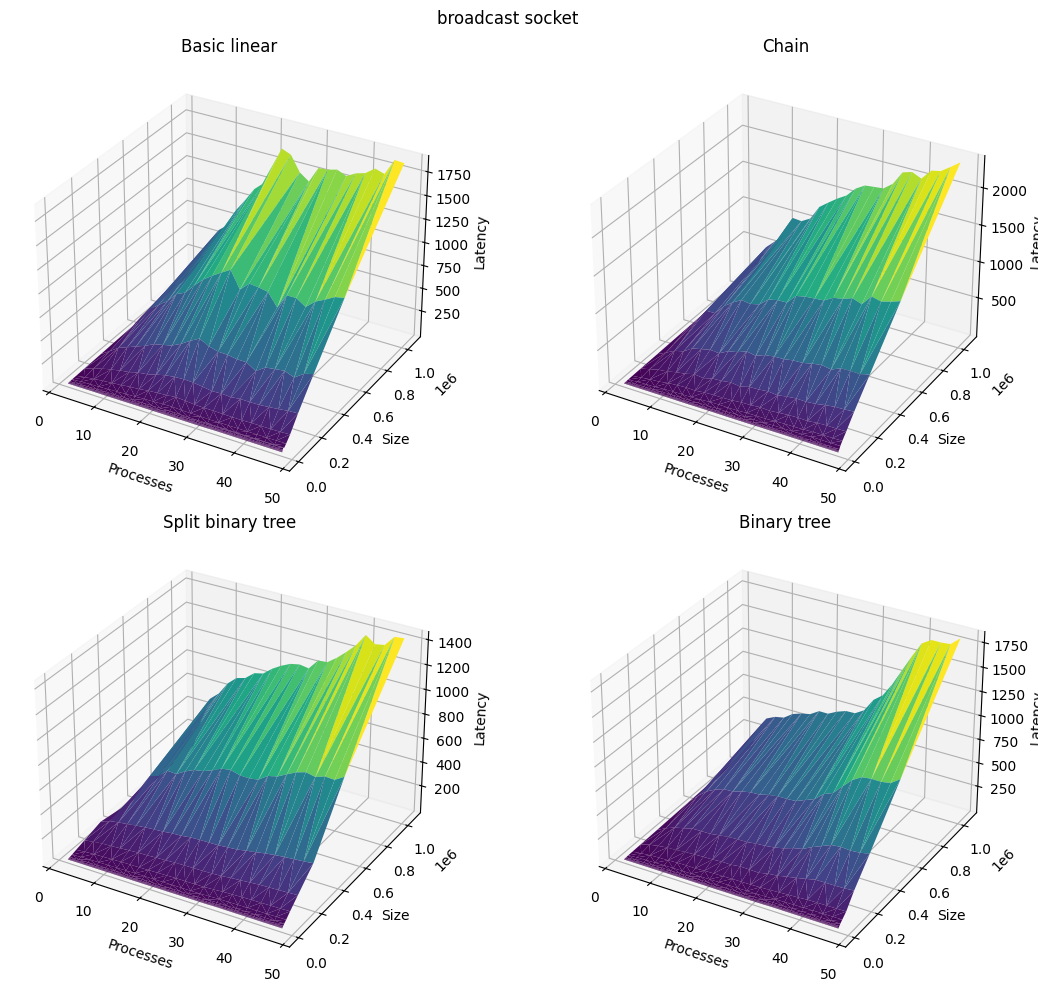

In [89]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_socket_thin.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    #fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')

axs[0,0].set_title('Basic linear')
axs[0,1].set_title('Chain')
axs[1,0].set_title('Split binary tree')
axs[1,1].set_title('Binary tree')

fig.suptitle('broadcast socket')

# Mostra la figura
plt.tight_layout()
plt.show()


/var/folders/72/24j7jy9s6sb2xm_dc84kdhm00000gn/T/ipykernel_98205/3125114962.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Log_Processes'] = np.log2(data['Processes'])


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.321e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:00:42   Log-Likelihood:                -2416.3
No. Observations:                 480   AIC:                             4841.
Df Residuals:                     476   BIC:                             4857.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1454      7.008     -0.021

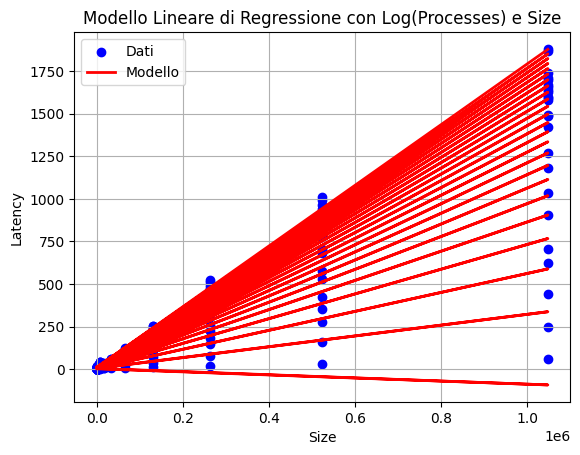

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_socket_thin.csv")

# Seleziona le covariate e la variabile dipendente
X = data[['Size']]
y = data['Latency']

# Calcola il logaritmo in base due dei processi
X['Log_Processes'] = np.log2(data['Processes'])

X['Interaction'] = X['Log_Processes'] * X['Size']
# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Size'], y, color='blue', label='Dati')
plt.plot(data['Size'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Log(Processes) e Size')
plt.legend()
plt.grid(True)
plt.show()


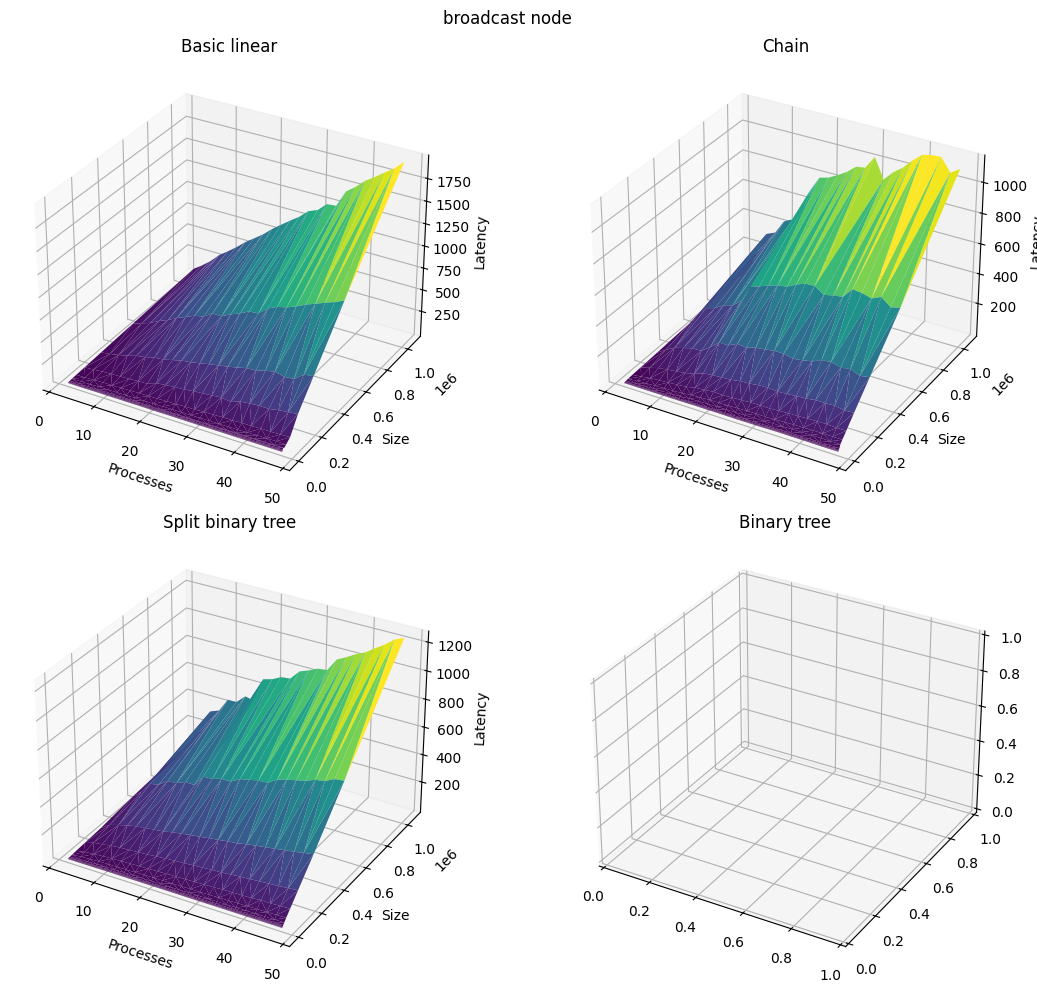

In [16]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_node_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_node_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_node_thin.csv",
   # "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_node_thin.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    #fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')

axs[0,0].set_title('Basic linear')
axs[0,1].set_title('Chain')
axs[1,0].set_title('Split binary tree')
axs[1,1].set_title('Binary tree')

fig.suptitle('broadcast node')

# Mostra la figura
plt.tight_layout()
plt.show()


/var/folders/72/24j7jy9s6sb2xm_dc84kdhm00000gn/T/ipykernel_98205/3374493932.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Log_Processes'] = np.log2(data['Processes'])


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     3888.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:59:42   Log-Likelihood:                -2615.3
No. Observations:                 480   AIC:                             5239.
Df Residuals:                     476   BIC:                             5255.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9060     10.609      0.085

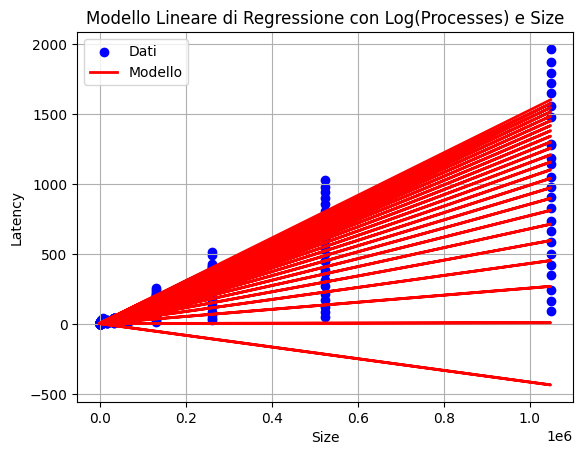

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_node_thin.csv")

# Seleziona le covariate e la variabile dipendente
X = data[['Size']]
y = data['Latency']

# Calcola il logaritmo in base due dei processi
X['Log_Processes'] = np.log2(data['Processes'])

X['Interaction'] = X['Log_Processes'] * X['Size']
# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Size'], y, color='blue', label='Dati')
plt.plot(data['Size'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Log(Processes) e Size')
plt.legend()
plt.grid(True)
plt.show()


## SCATTER VARIATING SIZE

/Users/edoardozappia/Library/Python/3.9/lib/python/site-packages/pandas/core/series.py:1021: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


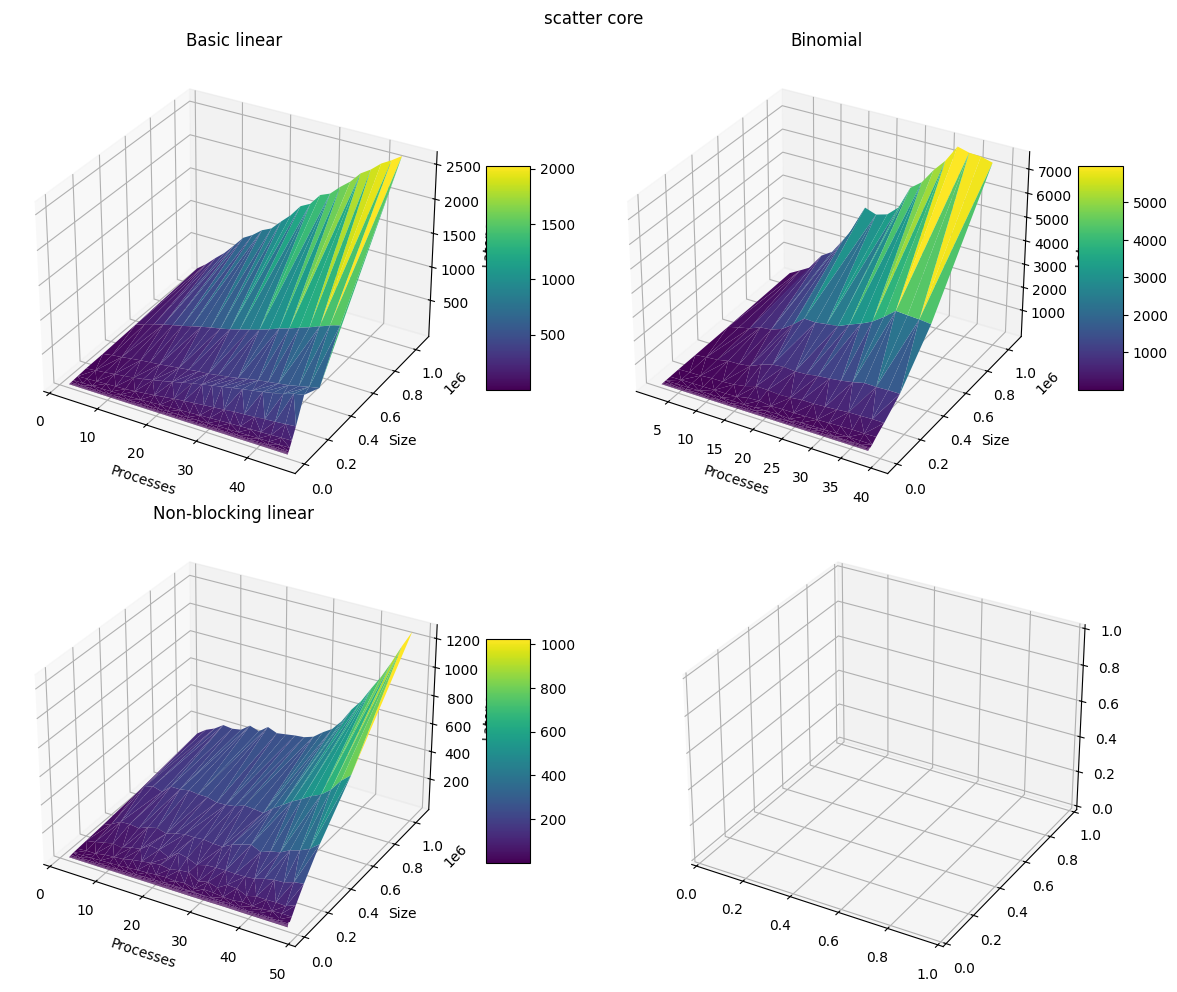

In [20]:
# Lista dei percorsi dei file CSV
file_paths = [
    #"/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_core_thin.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')

#axs[0,0].set_title('Default')
axs[0,0].set_title('Basic linear')
axs[0,1].set_title('Binomial')
axs[1,0].set_title('Non-blocking linear')

fig.suptitle('scatter core')

# Mostra la figura
plt.tight_layout()
plt.show()


/var/folders/72/24j7jy9s6sb2xm_dc84kdhm00000gn/T/ipykernel_98205/1959536101.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Log_Processes'] = np.log2(data['Processes'])


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1939.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.29e-258
Time:                        23:08:05   Log-Likelihood:                -2748.7
No. Observations:                 458   AIC:                             5505.
Df Residuals:                     454   BIC:                             5522.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -16.9215     18.719     -0.904

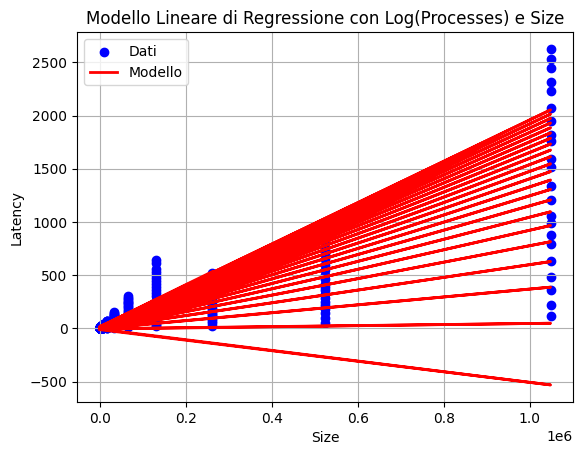

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_core_thin.csv")

# Seleziona le covariate e la variabile dipendente
X = data[['Size']]
y = data['Latency']

# Calcola il logaritmo in base due dei processi
X['Log_Processes'] = np.log2(data['Processes'])

X['Interaction'] = X['Log_Processes'] * X['Size']
# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Size'], y, color='blue', label='Dati')
plt.plot(data['Size'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Log(Processes) e Size')
plt.legend()
plt.grid(True)
plt.show()


/Users/edoardozappia/Library/Python/3.9/lib/python/site-packages/pandas/core/series.py:1021: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


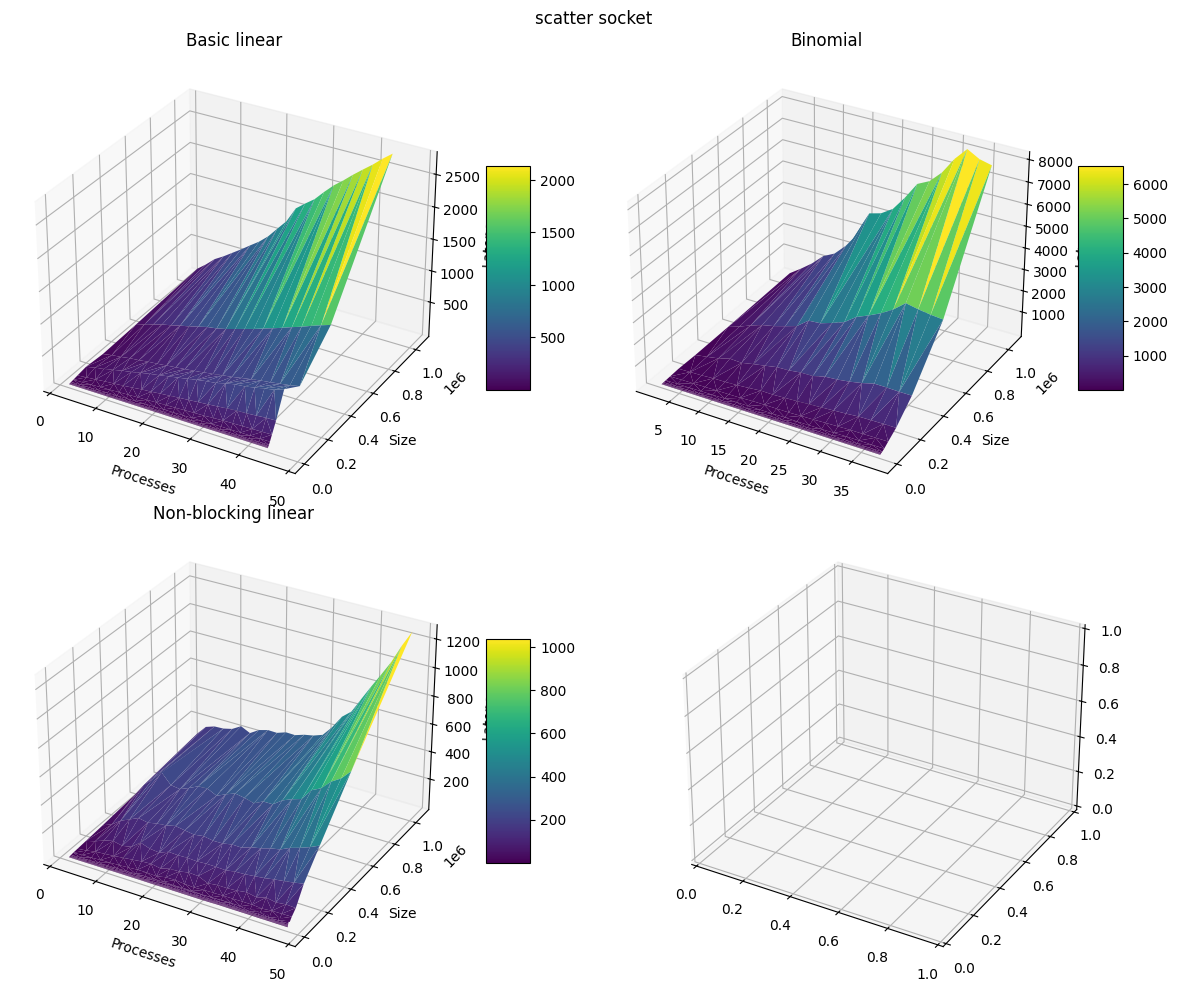

In [22]:
# Lista dei percorsi dei file CSV
file_paths = [
    #"/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_socket_thin.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')

#axs[0,0].set_title('Default')
axs[0,0].set_title('Basic linear')
axs[0,1].set_title('Binomial')
axs[1,0].set_title('Non-blocking linear')

fig.suptitle('scatter socket')

# Mostra la figura
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1493.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          7.43e-229
Time:                        23:21:16   Log-Likelihood:                -2706.9
No. Observations:                 440   AIC:                             5422.
Df Residuals:                     436   BIC:                             5438.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.9909     22.089     -0.090

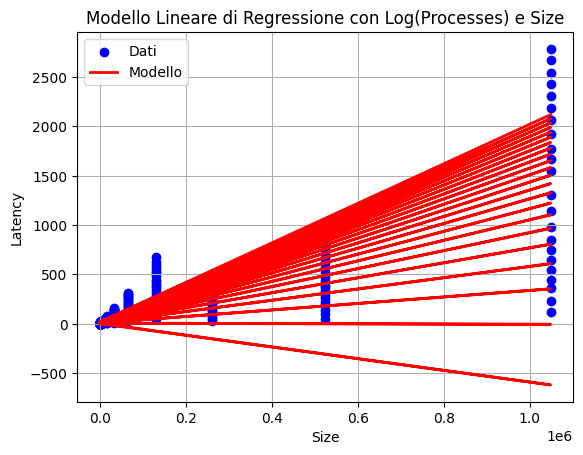

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_socket_thin.csv")

# Limita il DataFrame alle prime 441 righe
data = data.iloc[:440]

# Calcola il logaritmo in base due dei processi
log_processes = np.log2(data['Processes'])

# Calcola l'interazione tra il logaritmo dei processi e la dimensione
interaction = log_processes * data['Size']

# Crea un nuovo DataFrame per le covariate
X = pd.DataFrame({'Size': data['Size'], 'Log_Processes': log_processes, 'Interaction': interaction})

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Seleziona la variabile dipendente
y = data['Latency']

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Size'], y, color='blue', label='Dati')
plt.plot(data['Size'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Log(Processes) e Size')
plt.legend()
plt.grid(True)
plt.show()


/Users/edoardozappia/Library/Python/3.9/lib/python/site-packages/pandas/core/series.py:1021: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


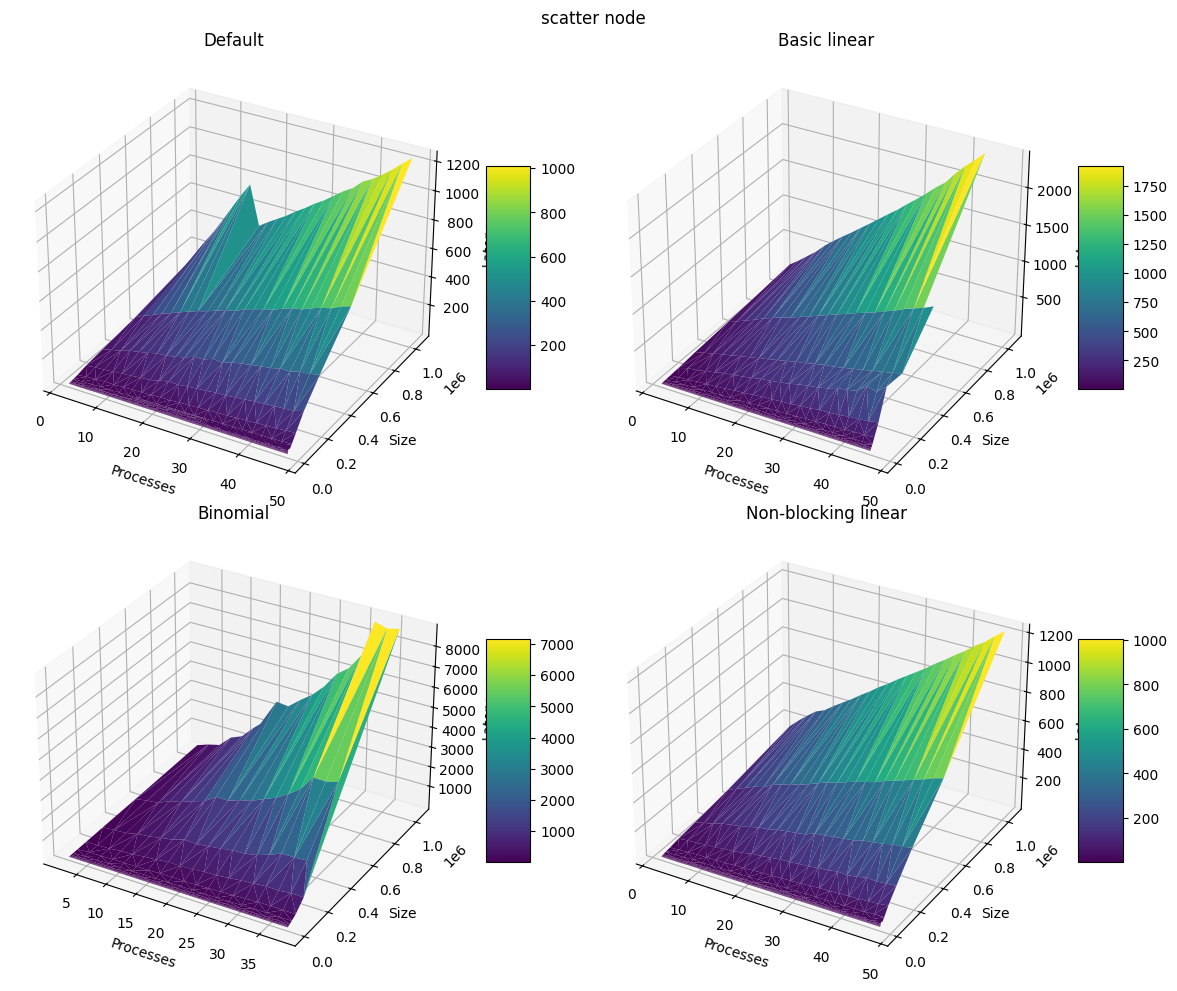

In [33]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_node_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_node_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_node_thin.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')

axs[0,0].set_title('Default')
axs[0,1].set_title('Basic linear')
axs[1,0].set_title('Binomial')
axs[1,1].set_title('Non-blocking linear')

fig.suptitle('scatter node')

# Mostra la figura
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     2747.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          5.15e-291
Time:                        23:28:12   Log-Likelihood:                -2649.1
No. Observations:                 459   AIC:                             5306.
Df Residuals:                     455   BIC:                             5323.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -12.8774     14.871     -0.866

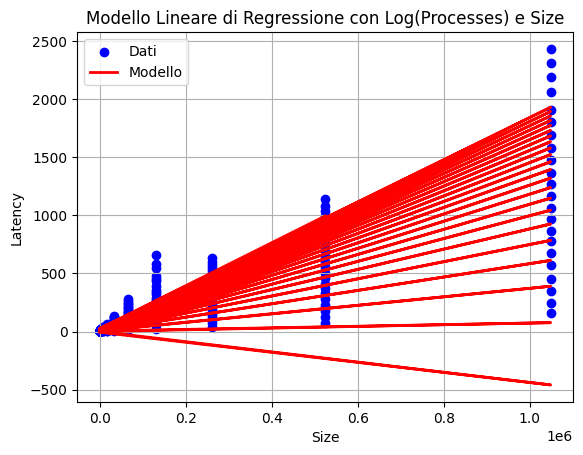

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin.csv")

# Limita il DataFrame alle prime 441 righe
data = data.iloc[:459]

# Calcola il logaritmo in base due dei processi
log_processes = np.log2(data['Processes'])

# Calcola l'interazione tra il logaritmo dei processi e la dimensione
interaction = log_processes * data['Size']

# Crea un nuovo DataFrame per le covariate
X = pd.DataFrame({'Size': data['Size'], 'Log_Processes': log_processes, 'Interaction': interaction})

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Seleziona la variabile dipendente
y = data['Latency']

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Size'], y, color='blue', label='Dati')
plt.plot(data['Size'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Log(Processes) e Size')
plt.legend()
plt.grid(True)
plt.show()


## BROADCAST FIXED SIZE

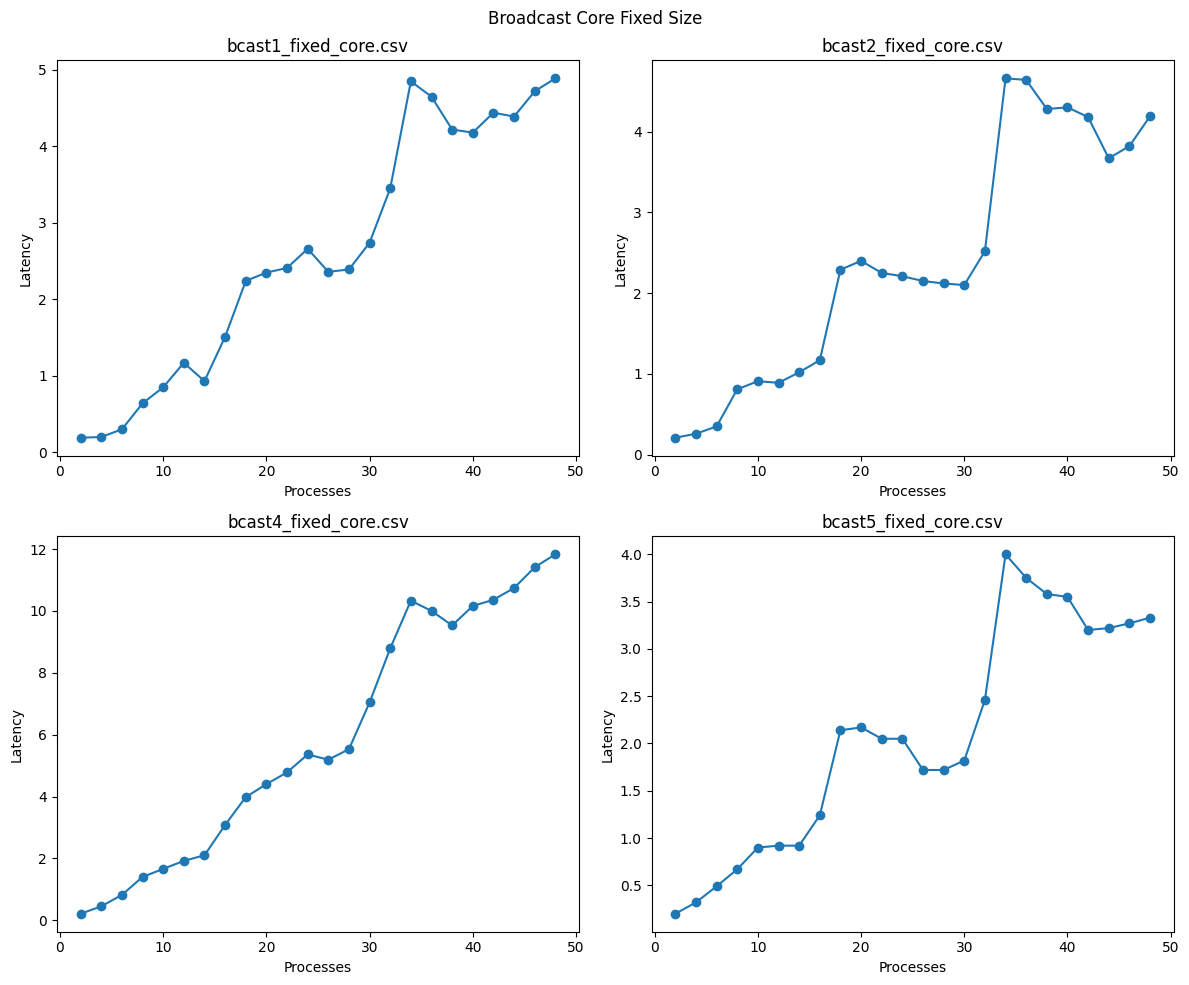

In [40]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_core.csv",
]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    axs[row_index, col_index].plot(x, y, marker='o', linestyle='-')
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Latency')
    axs[row_index, col_index].set_title(file_path.split("/")[-1])

# Aggiungi il titolo globale alla figura
fig.suptitle('Broadcast Core Fixed Size')

# Mostra la figura
plt.tight_layout()
plt.show()


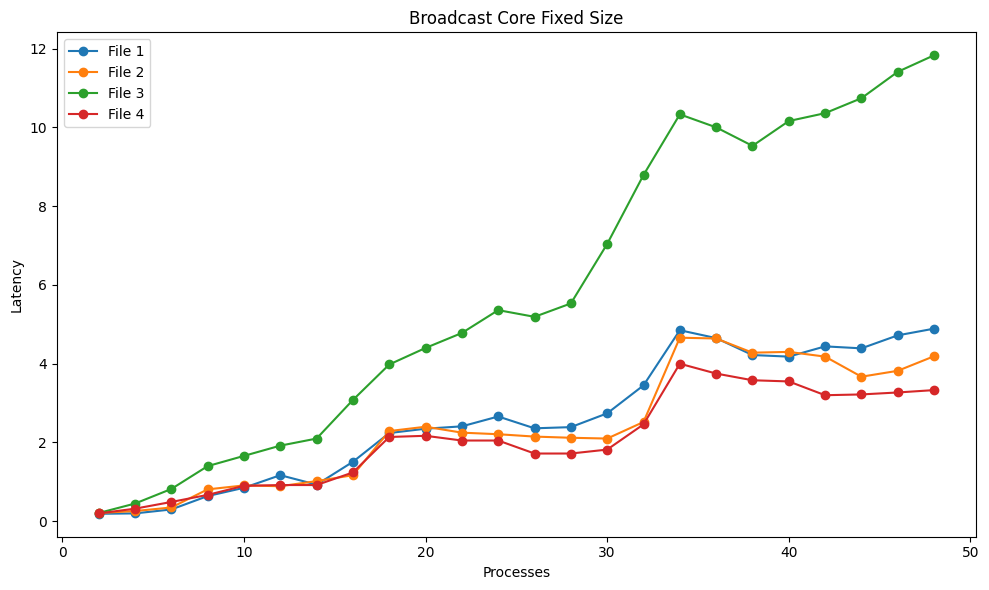

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_core.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

# Aggiungi legenda e titolo
ax.legend()
ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Broadcast Core Fixed Size')

# Mostra il grafico
plt.tight_layout()
plt.show()


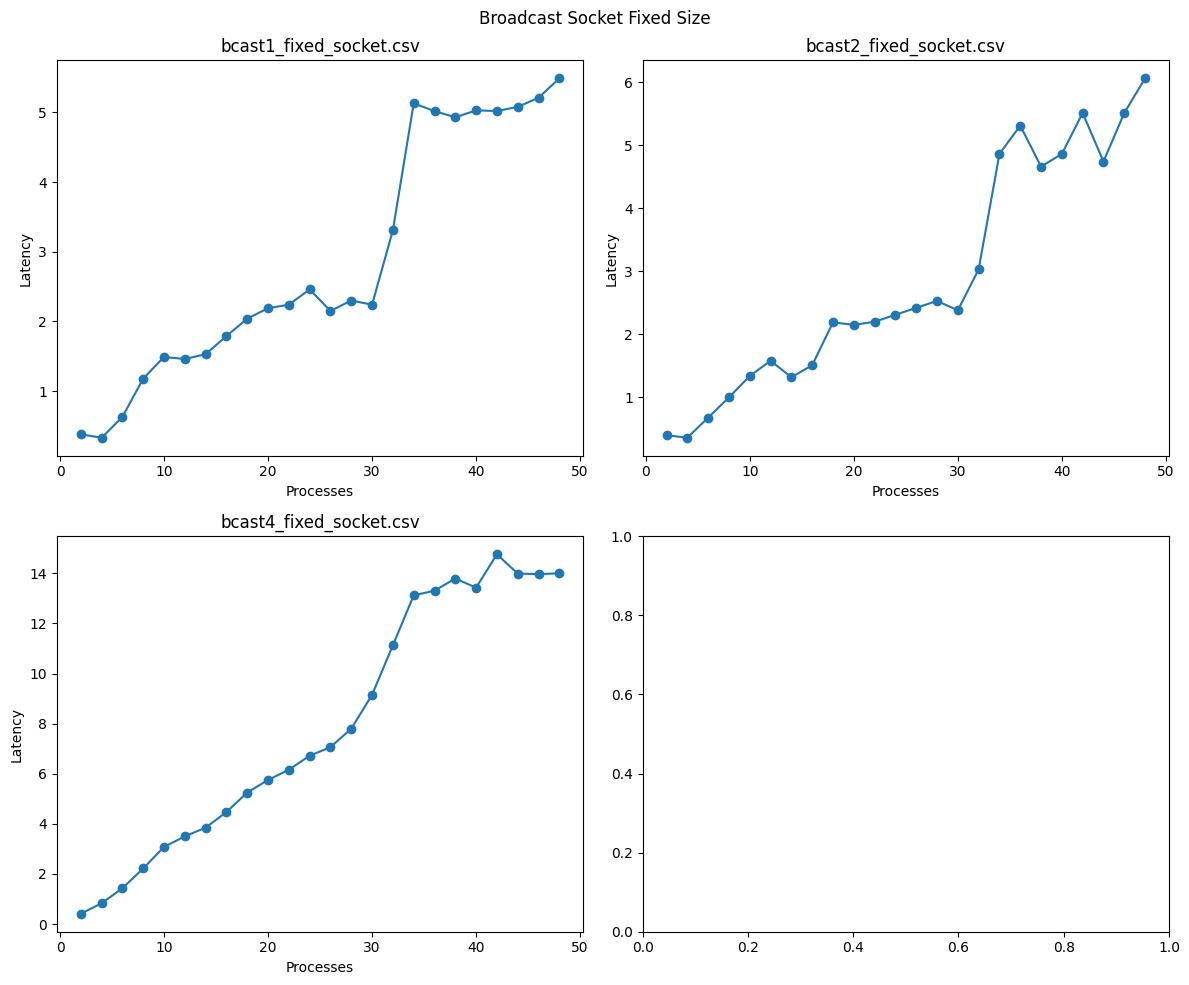

In [43]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_socket.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_socket.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_socket.csv",
    #"/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_socket.csv",
]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    axs[row_index, col_index].plot(x, y, marker='o', linestyle='-')
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Latency')
    axs[row_index, col_index].set_title(file_path.split("/")[-1])

# Aggiungi il titolo globale alla figura
fig.suptitle('Broadcast Socket Fixed Size')

# Mostra la figura
plt.tight_layout()
plt.show()


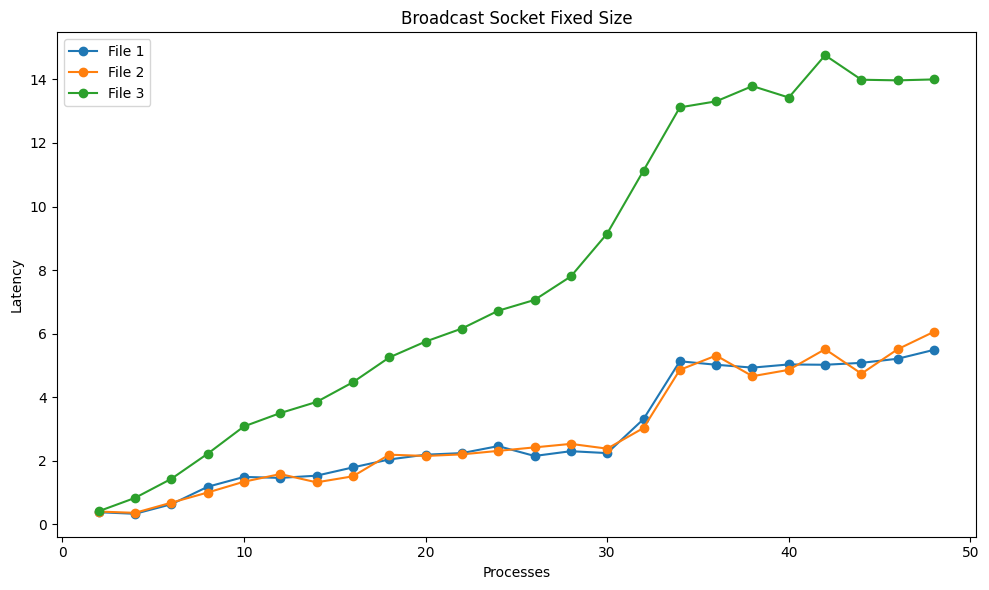

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_socket.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_socket.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_socket.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

# Aggiungi legenda e titolo
ax.legend()
ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Broadcast Socket Fixed Size')

# Mostra il grafico
plt.tight_layout()
plt.show()


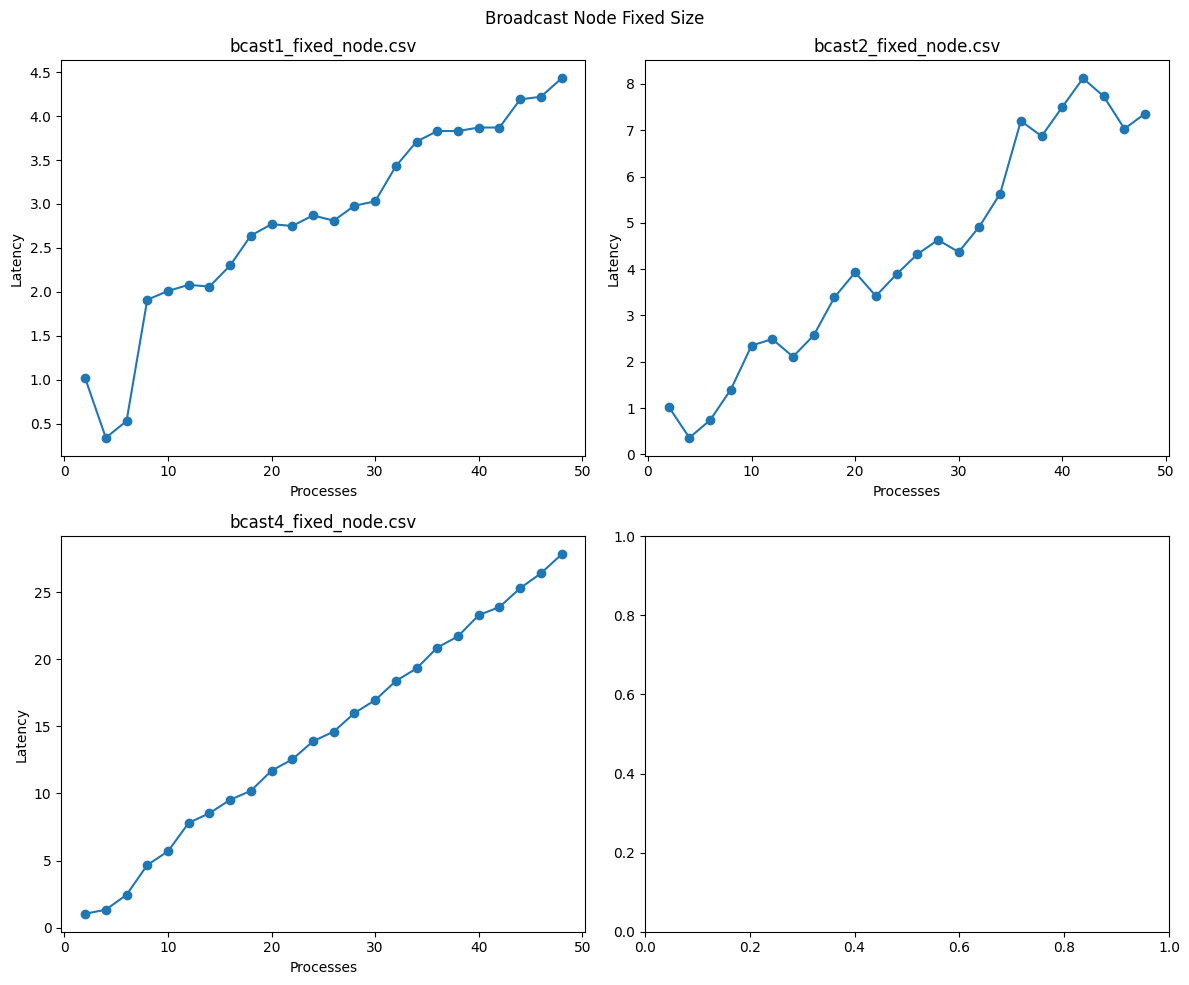

In [45]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_node.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_node.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_node.csv",
    #"/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_node.csv",
]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    axs[row_index, col_index].plot(x, y, marker='o', linestyle='-')
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Latency')
    axs[row_index, col_index].set_title(file_path.split("/")[-1])

# Aggiungi il titolo globale alla figura
fig.suptitle('Broadcast Node Fixed Size')

# Mostra la figura
plt.tight_layout()
plt.show()


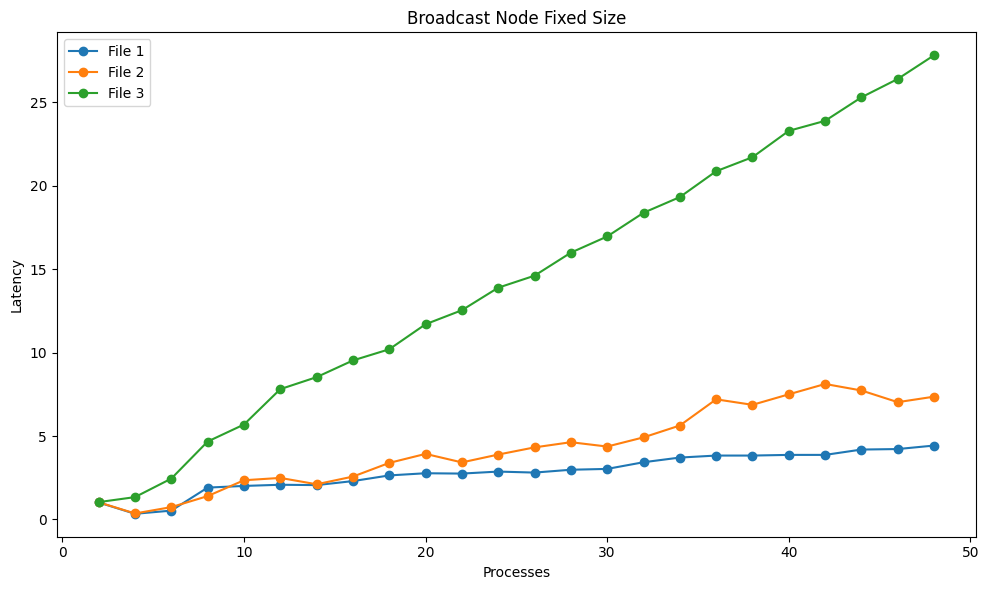

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_node.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_node.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_node.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

# Aggiungi legenda e titolo
ax.legend()
ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Broadcast Node Fixed Size')

# Mostra il grafico
plt.tight_layout()
plt.show()


## SCATTER FIXED SIZE

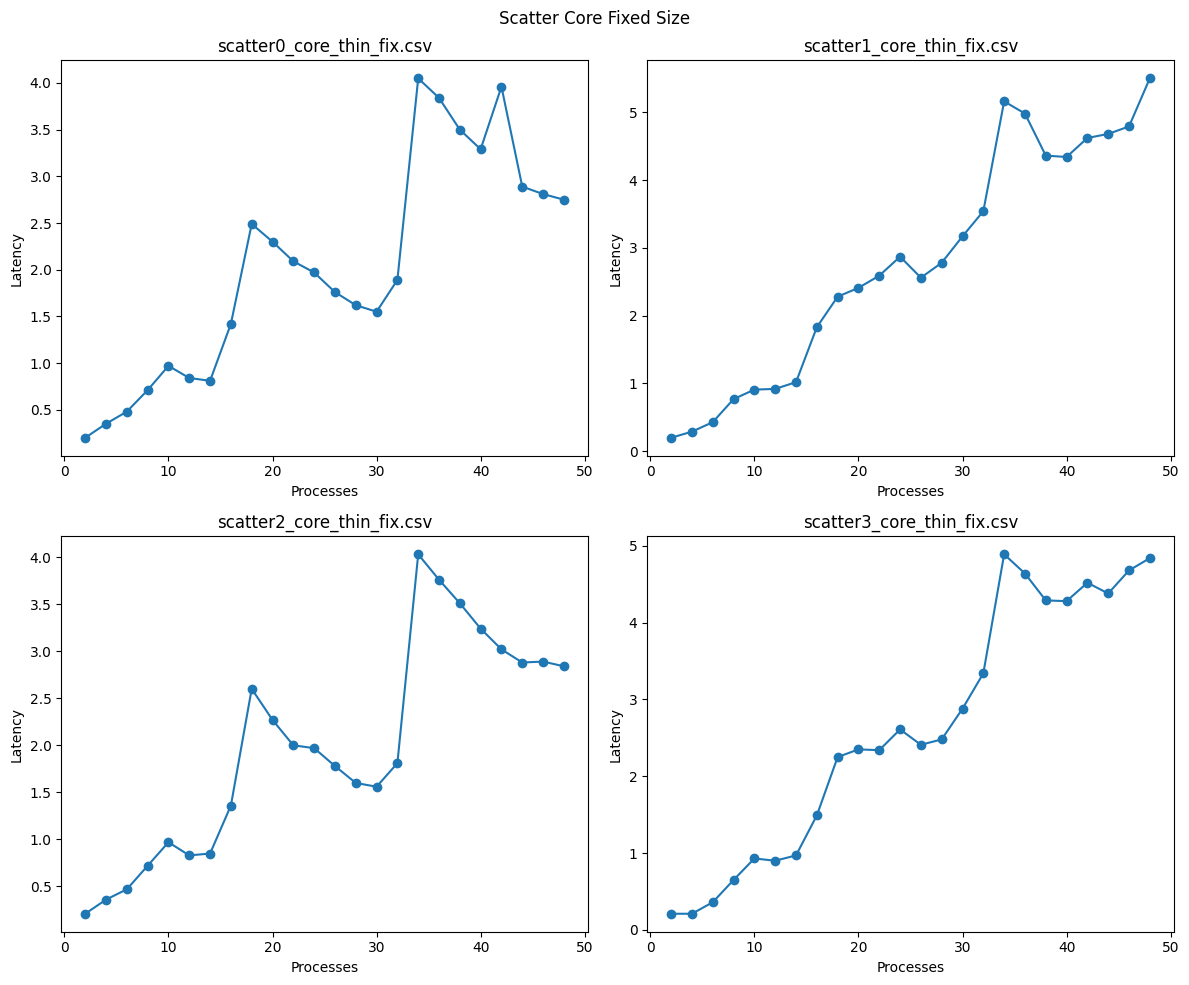

In [110]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_core_thin_fix.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    axs[row_index, col_index].plot(x, y, marker='o', linestyle='-')
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Latency')
    axs[row_index, col_index].set_title(file_path.split("/")[-1])

# Aggiungi il titolo globale alla figura
fig.suptitle('Scatter Core Fixed Size')

# Mostra la figura
plt.tight_layout()
plt.show()


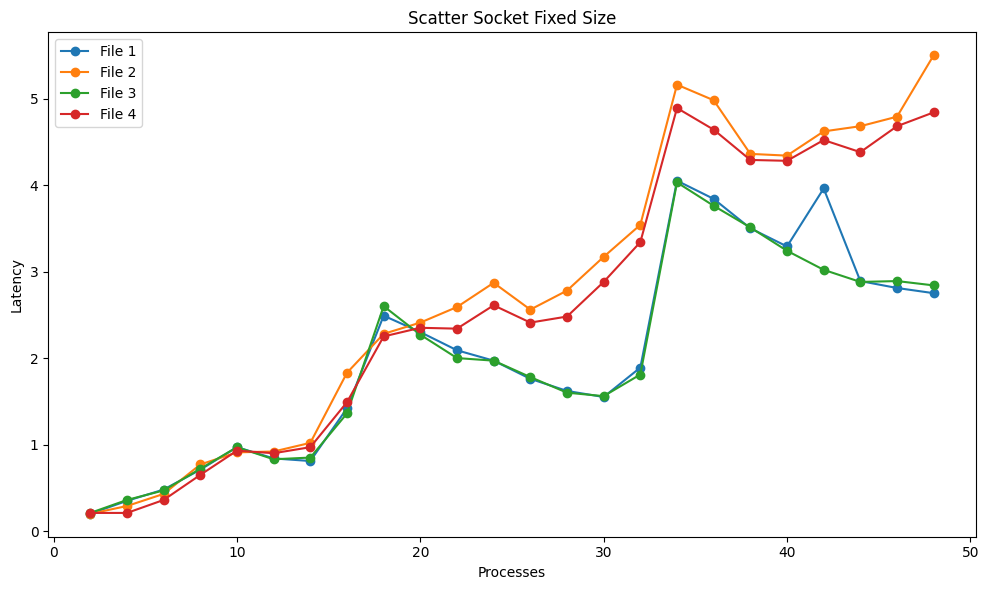

In [111]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_core_thin_fix.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

# Aggiungi legenda e titolo
ax.legend()
ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Scatter Socket Fixed Size')

# Mostra il grafico
plt.tight_layout()
plt.show()


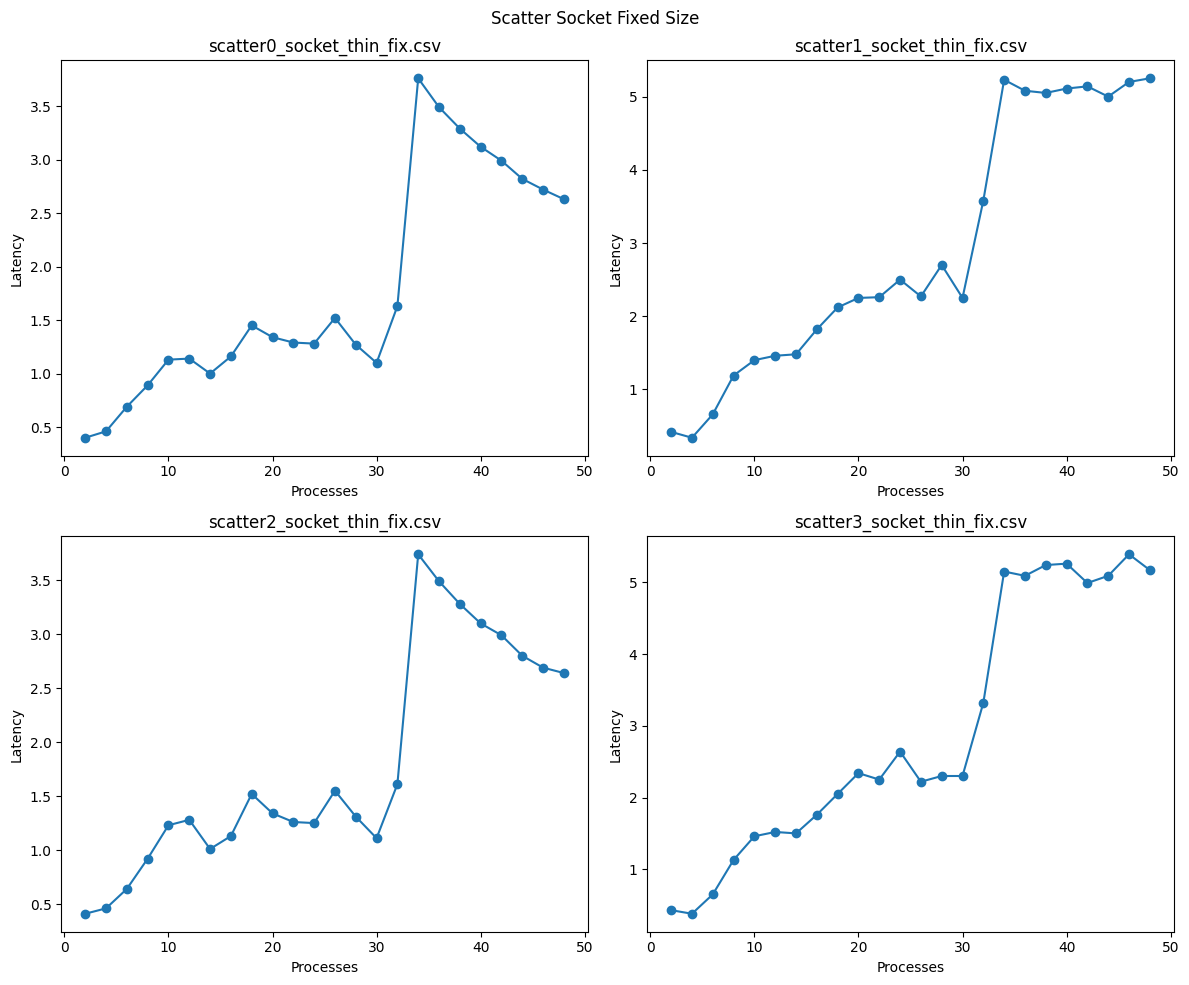

In [47]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_socket_thin_fix.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    axs[row_index, col_index].plot(x, y, marker='o', linestyle='-')
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Latency')
    axs[row_index, col_index].set_title(file_path.split("/")[-1])

# Aggiungi il titolo globale alla figura
fig.suptitle('Scatter Socket Fixed Size')

# Mostra la figura
plt.tight_layout()
plt.show()


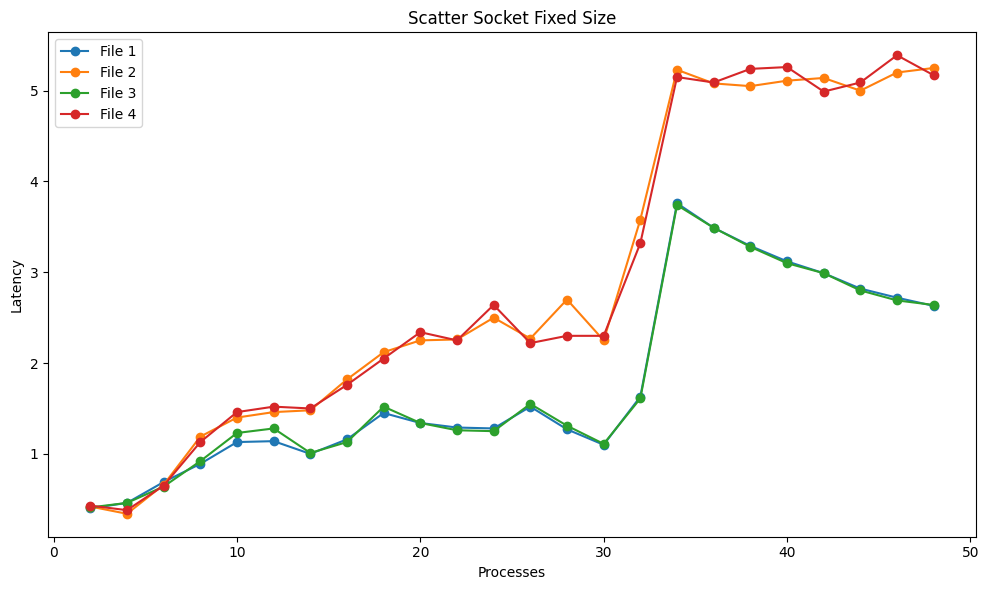

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_socket_thin_fix.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

# Aggiungi legenda e titolo
ax.legend()
ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Scatter Socket Fixed Size')

# Mostra il grafico
plt.tight_layout()
plt.show()


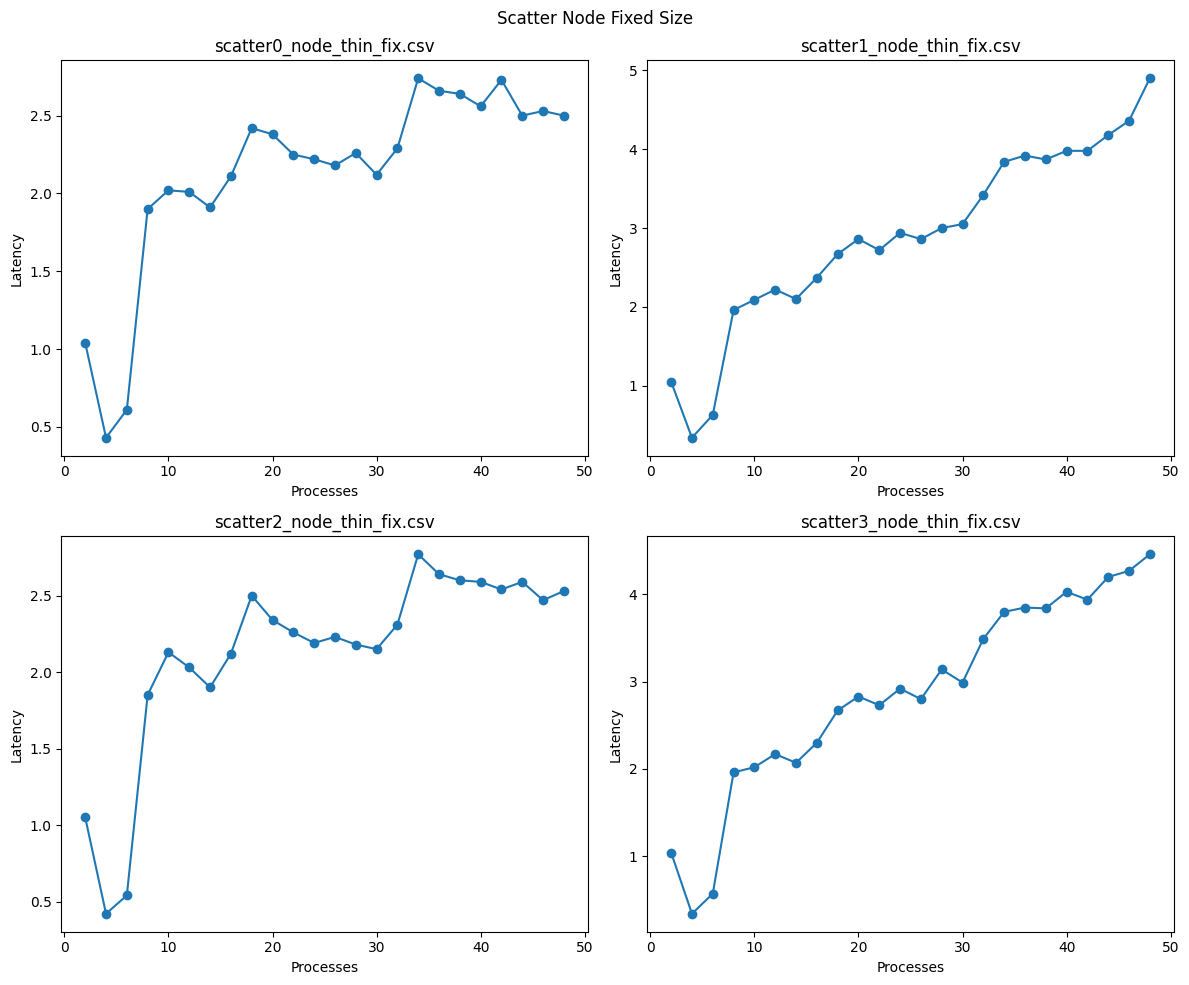

In [48]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_node_thin_fix.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    axs[row_index, col_index].plot(x, y, marker='o', linestyle='-')
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Latency')
    axs[row_index, col_index].set_title(file_path.split("/")[-1])

# Aggiungi il titolo globale alla figura
fig.suptitle('Scatter Node Fixed Size')

# Mostra la figura
plt.tight_layout()
plt.show()


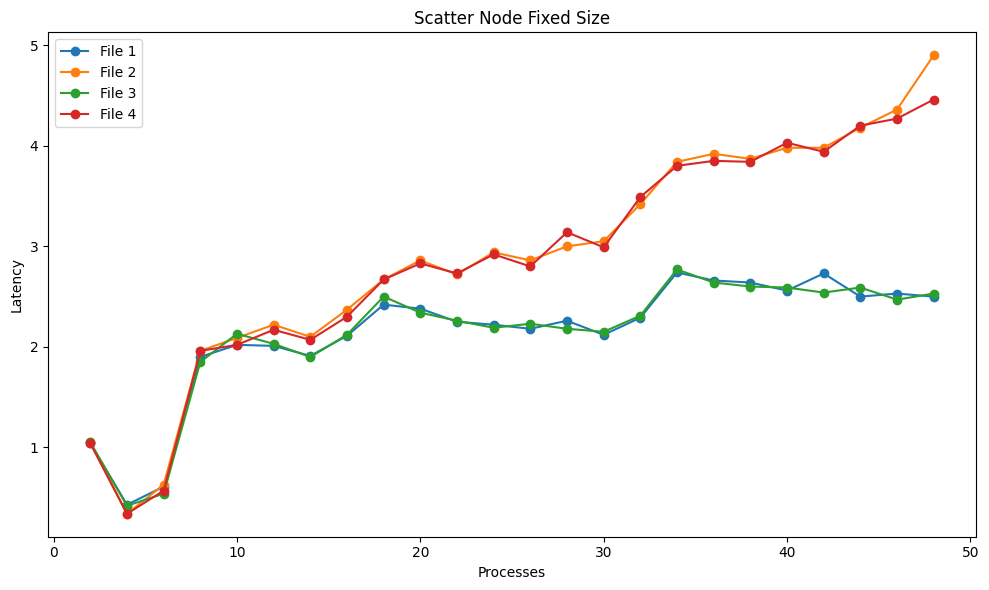

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
     "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_node_thin_fix.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

# Aggiungi legenda e titolo
ax.legend()
ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Scatter Node Fixed Size')

# Mostra il grafico
plt.tight_layout()
plt.show()


## MODELLO SCATTER DAFAULT SOCKET

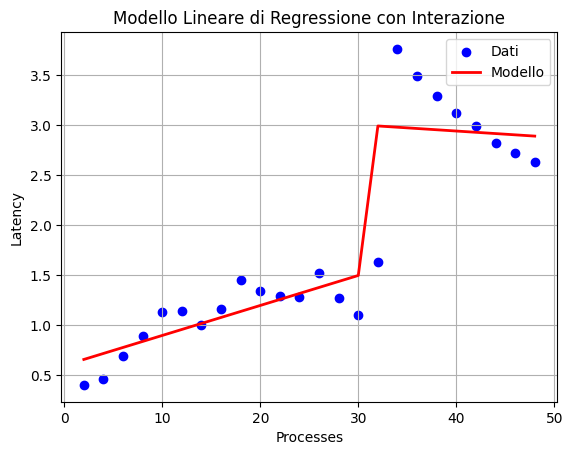

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv")

# Calcola il numero di processi maggiori di 30
data['Processes_gt_30'] = (data['Processes'] > 30).astype(int)

# Aggiungi il termine di interazione
data['Interaction'] = data['Processes'] * data['Processes_gt_30']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes', 'Processes_gt_30', 'Interaction']]
y = data['Latency']

# Crea il modello di regressione lineare
model = LinearRegression()

# Adatta il modello ai dati
model.fit(X, y)

# Predici i valori della latenza utilizzando il modello
y_pred = model.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Interazione')
plt.legend()
plt.grid(True)
plt.show()


In [71]:
pip install statsmodels

Python(38014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.5 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 55.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv")

# Calcola il numero di processi maggiori di 30
data['Processes_gt_30'] = (data['Processes'] > 30).astype(int)

# Aggiungi il termine di interazione
data['Interaction'] = data['Processes'] * data['Processes_gt_30']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes', 'Processes_gt_30', 'Interaction']]
y = data['Latency']

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     38.49
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.69e-08
Time:                        16:27:07   Log-Likelihood:                -11.161
No. Observations:                  24   AIC:                             30.32
Df Residuals:                      20   BIC:                             35.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5947      0.229     

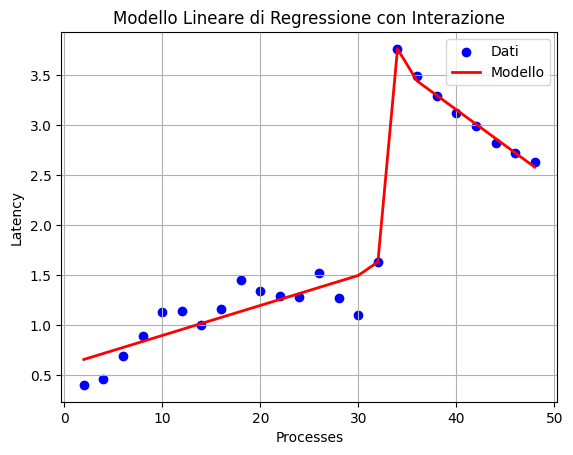

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv")

# Crea le covariate per i processi tra 1 e 30, tra 30 e 34 e maggiori di 34
data['Processes_1_30'] = ((data['Processes'] >= 1) & (data['Processes'] <= 30)).astype(int)
data['Processes_30_34'] = ((data['Processes'] > 30) & (data['Processes'] <= 34)).astype(int)
data['Processes_gt_34'] = (data['Processes'] > 34).astype(int)

# Aggiungi le interazioni
data['Interaction_1_30'] = data['Processes_1_30'] * data['Processes']
data['Interaction_30_34'] = data['Processes_30_34'] * data['Processes']
data['Interaction_gt_34'] = data['Processes_gt_34'] * data['Processes']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes_1_30', 'Processes_30_34', 'Processes_gt_34',
          'Interaction_1_30', 'Interaction_30_34', 'Interaction_gt_34']]
y = data['Latency']

# Crea il modello di regressione lineare
model = LinearRegression()

# Adatta il modello ai dati
model.fit(X, y)

# Predici i valori della latenza utilizzando il modello
y_pred = model.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Interazione')
plt.legend()
plt.grid(True)
plt.show()


In [74]:
import pandas as pd
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv")

# Crea le covariate per i processi tra 1 e 30, tra 30 e 34 e maggiori di 34
data['Processes_1_30'] = ((data['Processes'] >= 1) & (data['Processes'] <= 30)).astype(int)
data['Processes_30_34'] = ((data['Processes'] > 30) & (data['Processes'] <= 34)).astype(int)
data['Processes_gt_34'] = (data['Processes'] > 34).astype(int)

# Aggiungi le interazioni
data['Interaction_1_30'] = data['Processes_1_30'] * data['Processes']
data['Interaction_30_34'] = data['Processes_30_34'] * data['Processes']
data['Interaction_gt_34'] = data['Processes_gt_34'] * data['Processes']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes_1_30', 'Processes_30_34', 'Processes_gt_34',
          'Interaction_1_30', 'Interaction_30_34', 'Interaction_gt_34']]
y = data['Latency']

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           5.73e-14
Time:                        16:31:51   Log-Likelihood:                 10.767
No. Observations:                  24   AIC:                            -9.533
Df Residuals:                      18   BIC:                            -2.465
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.4579      1.05

## MODELLO SCATTER DEFAULT NODE

                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     34.58
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           6.45e-06
Time:                        16:38:53   Log-Likelihood:                -10.435
No. Observations:                  24   AIC:                             24.87
Df Residuals:                      22   BIC:                             27.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2793      0.164      7.777      0.0

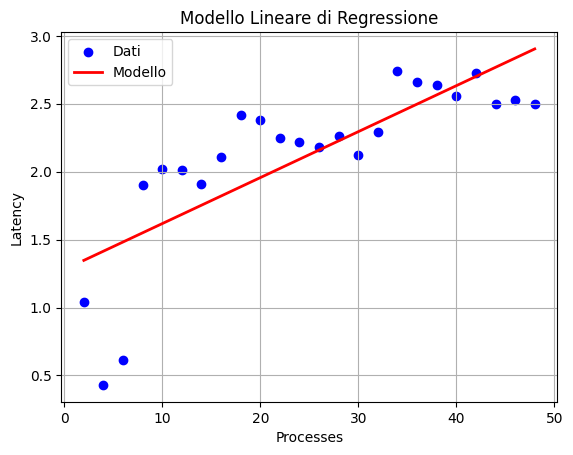

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_node_thin_fix.csv")

# Seleziona le covariate e la variabile dipendente
X = data[['Processes']]
y = data['Latency']

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione')
plt.legend()
plt.grid(True)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     35.41
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           3.42e-08
Time:                        16:44:02   Log-Likelihood:                0.33747
No. Observations:                  24   AIC:                             7.325
Df Residuals:                      20   BIC:                             12.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3050      0.320      0.

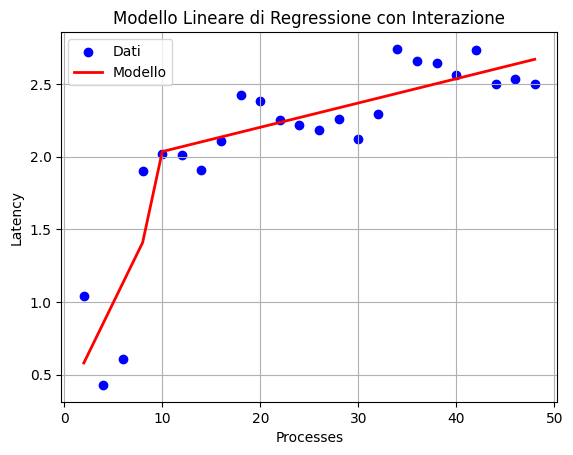

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_node_thin_fix.csv")

# Calcola la covariata per i processi maggiori di 8
data['Processes_gt_8'] = (data['Processes'] > 8).astype(int)

# Calcola la covariata di interazione tra processi e processi maggiori di 8
data['Interaction'] = data['Processes'] * data['Processes_gt_8']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes', 'Processes_gt_8', 'Interaction']]
y = data['Latency']

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Interazione')
plt.legend()
plt.grid(True)
plt.show()


## MODELLO BCAST 1 NODE

                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     251.7
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.58e-13
Time:                        16:47:31   Log-Likelihood:                -6.2628
No. Observations:                  24   AIC:                             16.53
Df Residuals:                      22   BIC:                             18.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8930      0.138      6.460      0.0

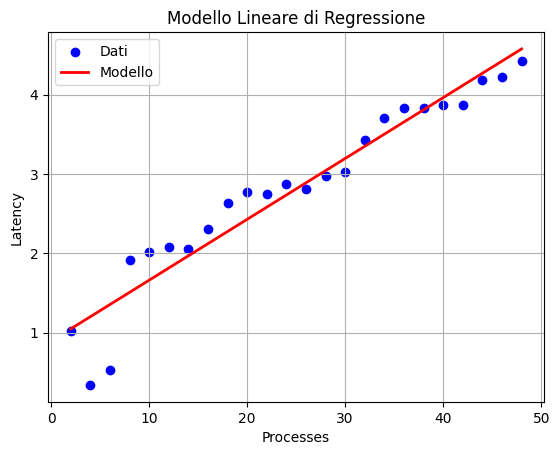

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_node.csv")

# Seleziona le covariate e la variabile dipendente
X = data[['Processes']]
y = data['Latency']

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione')
plt.legend()
plt.grid(True)
plt.show()


## MODELLO BCAST 1 SCATTER

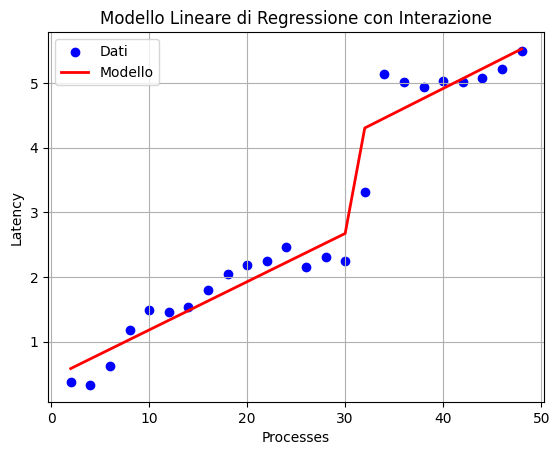

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_socket.csv")

# Calcola il numero di processi maggiori di 30
data['Processes_gt_30'] = (data['Processes'] > 30).astype(int)

# Aggiungi il termine di interazione
data['Interaction'] = data['Processes'] * data['Processes_gt_30']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes', 'Processes_gt_30', 'Interaction']]
y = data['Latency']

# Crea il modello di regressione lineare
model = LinearRegression()

# Adatta il modello ai dati
model.fit(X, y)

# Predici i valori della latenza utilizzando il modello
y_pred = model.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Interazione')
plt.legend()
plt.grid(True)
plt.show()


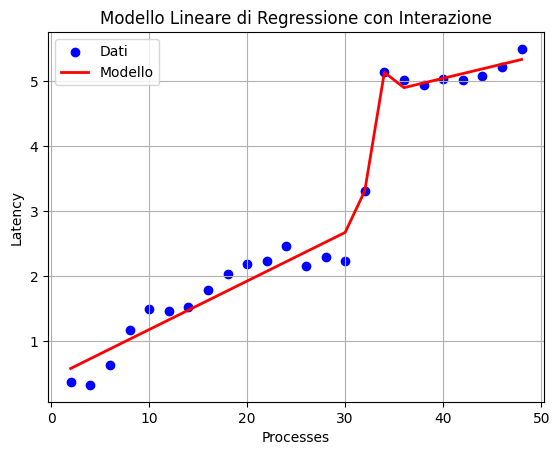

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_socket.csv")

# Crea le covariate per i processi tra 1 e 30, tra 30 e 34 e maggiori di 34
data['Processes_1_30'] = ((data['Processes'] >= 1) & (data['Processes'] <= 30)).astype(int)
data['Processes_30_34'] = ((data['Processes'] > 30) & (data['Processes'] <= 34)).astype(int)
data['Processes_gt_34'] = (data['Processes'] > 34).astype(int)

# Aggiungi le interazioni
data['Interaction_1_30'] = data['Processes_1_30'] * data['Processes']
data['Interaction_30_34'] = data['Processes_30_34'] * data['Processes']
data['Interaction_gt_34'] = data['Processes_gt_34'] * data['Processes']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes_1_30', 'Processes_30_34', 'Processes_gt_34',
          'Interaction_1_30', 'Interaction_30_34', 'Interaction_gt_34']]
y = data['Latency']

# Crea il modello di regressione lineare
model = LinearRegression()

# Adatta il modello ai dati
model.fit(X, y)

# Predici i valori della latenza utilizzando il modello
y_pred = model.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Interazione')
plt.legend()
plt.grid(True)
plt.show()
